# Visualising Data

In this section we examine some of the features of `matplotlib` a popular library for plotting data.

## Customizing a Plot

### Instantiating defaults

In the script below, we’ve instantiated (and commented) all the figure settings that influence the appearance of the plot.

The settings have been explicitly set to their default values, but now you can interactively play with the values to explore their affect (see Line properties and Line styles below).

In [4]:
import numpy as np
import matplotlib.pyplot as plt

([<matplotlib.axis.YTick at 0x11c6fba20>,
 <a list of 5 Text yticklabel objects>)

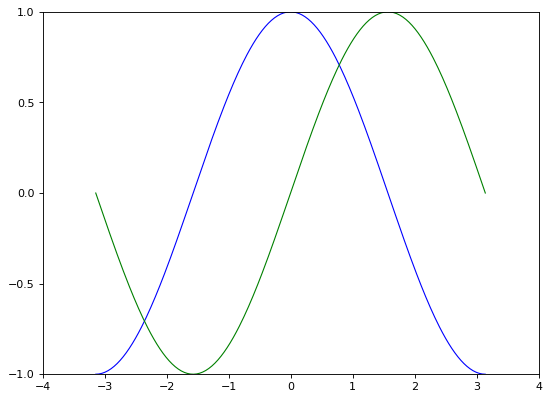

In [5]:
#Create a figure of size 8x6 inches, 80 dots per inch
plt.figure(figsize=(8, 6), dpi=80)

#Create a new subplot from a grid of 1x1
plt.subplot(1, 1, 1)

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

# Plot cosine with a blue continuous line of width 1 (pixels)
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-")

# Plot sine with a green continuous line of width 1 (pixels)
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-")

# Set x limits
plt.xlim(-4.0, 4.0)

# Set x ticks
plt.xticks(np.linspace(-4, 4, 9, endpoint=True))

# Set y limits
plt.ylim(-1.0, 1.0)

# Set y ticks
plt.yticks(np.linspace(-1, 1, 5, endpoint=True))

# Save figure using 72 dots per inch
# plt.savefig("exercise_2.png", dpi=72)

In [6]:
# Show result on screen
#plt.show()

### Changing colors and line widths

First step, we want to have the cosine in blue and the sine in red and a slighty thicker line for both of them. We’ll also slightly alter the figure size to make it more horizontal.

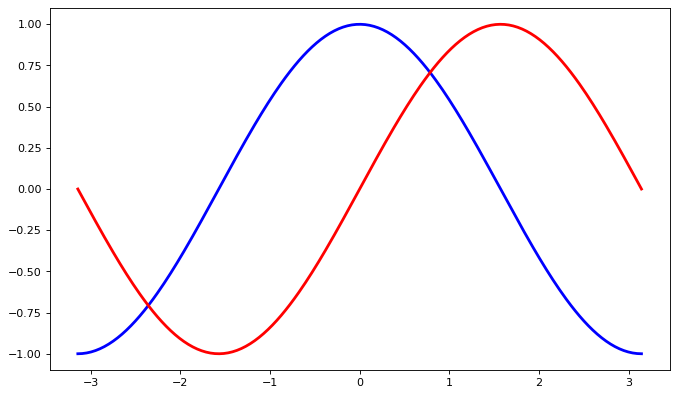

In [7]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")

### Setting limits

Current limits of the figure are a bit too tight and we want to make some space in order to clearly see all data points.


(-1.1, 1.0999165211263138)

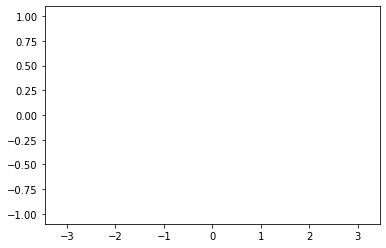

In [8]:
plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.ylim(C.min() * 1.1, C.max() * 1.1)

### Setting ticks

Current ticks are not ideal because they do not show the interesting values (+/-π,+/-π/2) for sine and cosine. We’ll change them such that they show only these values.


([<matplotlib.axis.YTick at 0x11cc3ccc0>,
 <a list of 3 Text yticklabel objects>)

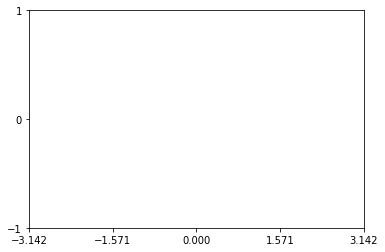

In [9]:
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])

### Setting tick labels

Ticks are now properly placed but their label is not very explicit. We could guess that 3.142 is π but it would be better to make it explicit. When we set tick values, we can also provide a corresponding label in the second argument list. Note that we’ll use latex to allow for nice rendering of the label.


([<matplotlib.axis.YTick at 0x11cd10b00>,
 <a list of 3 Text yticklabel objects>)

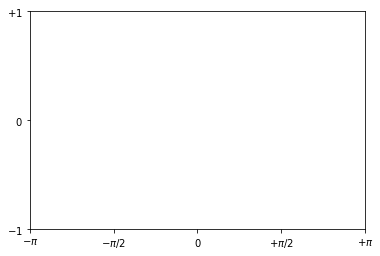

In [10]:
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
          [r'$-1$', r'$0$', r'$+1$'])

### Moving spines

Spines are the lines connecting the axis tick marks and noting the boundaries of the data area. They can be placed at arbitrary positions and until now, they were on the border of the axis. We’ll change that since we want to have them in the middle. Since there are four of them (top/bottom/left/right), we’ll discard the top and right by setting their color to none and we’ll move the bottom and left ones to coordinate 0 in data space coordinates.


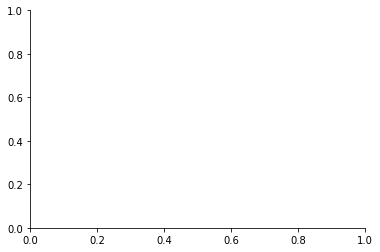

In [11]:
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))


### Adding a legend

Let’s add a legend in the upper left corner. This only requires adding the keyword argument label (that will be used in the legend box) to the plot commands.

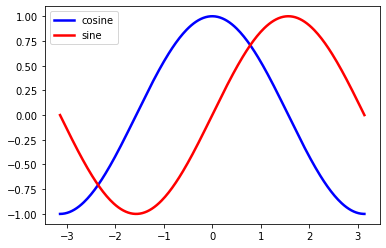

In [12]:
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="sine")

plt.legend(loc='upper left')

### Annotate some points

Let’s annotate some interesting points using the annotate command. We chose the 2π/3 value and we want to annotate both the sine and the cosine. We’ll first draw a marker on the curve as well as a straight dotted line. Then, we’ll use the annotate command to display some text with an arrow.


Text(10, 30, '$sin(\\frac{2\\pi}{3})=\\frac{\\sqrt{3}}{2}$')

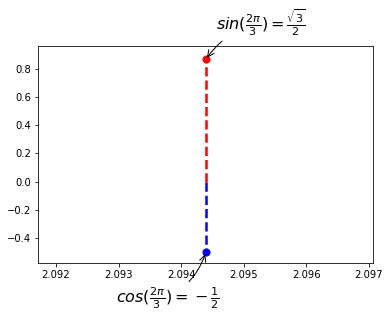

In [13]:
t = 2 * np.pi / 3
plt.plot([t, t], [0, np.cos(t)], color='blue', linewidth=2.5, linestyle="--")
plt.scatter([t, ], [np.cos(t), ], 50, color='blue')

plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t, t],[0, np.sin(t)], color='red', linewidth=2.5, linestyle="--")
plt.scatter([t, ],[np.sin(t), ], 50, color='red')

plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

Devil is in the details
The tick labels are now hardly visible because of the blue and red lines. We can make them bigger and we can also adjust their properties such that they’ll be rendered on a semi-transparent white background. This will allow us to see both the data and the labels.


In [14]:
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65))

### Putting it all together

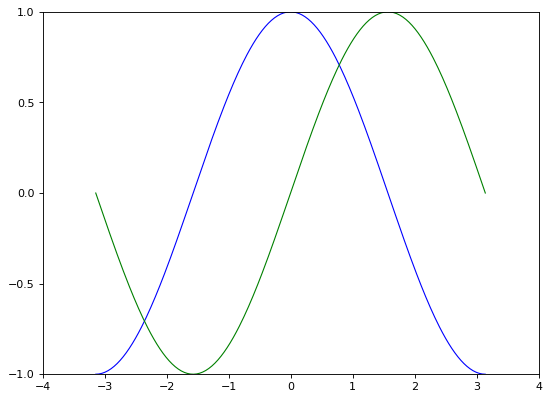

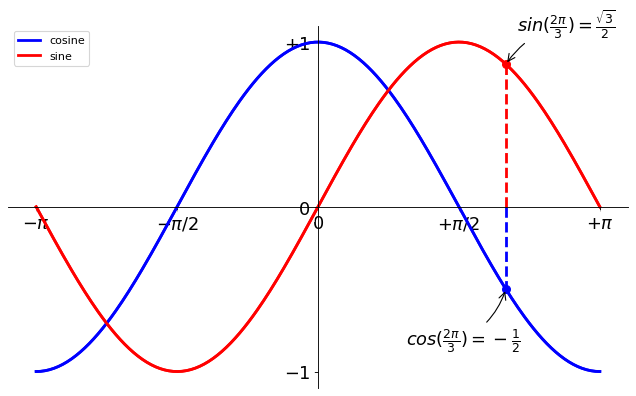

In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-")
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-")
plt.xlim(-4.0, 4.0)
plt.xticks(np.linspace(-4, 4, 9, endpoint=True))
plt.ylim(-1.0, 1.0)
plt.yticks(np.linspace(-1, 1, 5, endpoint=True))
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")
plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.ylim(C.min() * 1.1, C.max() * 1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
          [r'$-1$', r'$0$', r'$+1$'])
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="sine")
plt.legend(loc='upper left')
t = 2 * np.pi / 3
plt.plot([t, t], [0, np.cos(t)], color='blue', linewidth=2.5, linestyle="--")
plt.scatter([t, ], [np.cos(t), ], 50, color='blue')

plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t, t],[0, np.sin(t)], color='red', linewidth=2.5, linestyle="--")
plt.scatter([t, ],[np.sin(t), ], 50, color='red')

plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65))
plt.show()

## Figures, Subplots, Axes and Ticks

A “figure” in matplotlib means the whole window in the user interface. Within this figure there can be “subplots”.

So far we have used implicit figure and axes creation. This is handy for fast plots. We can have more control over the display using figure, subplot, and axes explicitly. While subplot positions the plots in a regular grid, axes allows free placement within the figure. Both can be useful depending on your intention. We’ve already worked with figures and subplots without explicitly calling them. When we call plot, matplotlib calls `gca()` to get the current axes and gca in turn calls `gcf()` to get the current figure. If there is none it calls `figure()` to make one, strictly speaking, to make a `subplot(111)`. Let’s look at the details.

### Figures

A figure is the windows in the GUI that has “Figure #” as title. Figures are numbered starting from 1 as opposed to the normal Python way starting from 0. This is clearly MATLAB-style. There are several parameters that determine what the figure looks like:

 Argument |	Default |	Description
 ----------|---------|---------------
 num |	1 	|number of figure
 figsize |	figure.figsize |	figure size in inches (width, height)
 dpi 	|figure.dpi |	resolution in dots per inch
 facecolor |	figure.facecolor |	color of the drawing background
 edgecolor |	figure.edgecolor |	color of edge around the drawing background
 frameon 	|True 	|draw figure frame or not

The defaults can be specified in the resource file and will be used most of the time. Only the number of the figure is frequently changed.

As with other objects, you can set figure properties also setp or with the set_something methods.

When you work with the GUI you can close a figure by clicking on the x in the upper right corner. But you can close a figure programmatically by calling close. Depending on the argument it closes (1) the current figure (no argument), (2) a specific figure (figure number or figure instance as argument), or (3) all figures ("all" as argument).

In [16]:
plt.close(1)     # Closes figure 1


## Graph Types


### Scatter Plots


```python
matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None
                          , norm=None, vmin=None, vmax=None, alpha=None
                          , linewidths=None, verts=None, edgecolors=None
                          , *, plotnonfinite=False, data=None, **kwargs)
```

A scatter plot of y vs x with varying marker size and/or color.

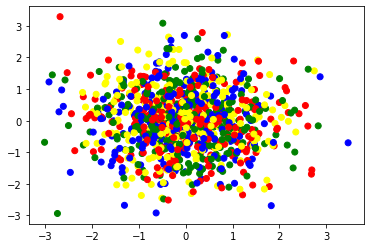

In [22]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

plt.scatter(X,Y, c=["red","green", "blue", "yellow"] * int(1024/4))

In the above example the colour of the plot alternates between four values.  The parameter `s` can be similarly manipulated to adjust the size of the dots.

### Bar Plots

```python
matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
```

Make a bar plot.

The bars are positioned at x with the given alignment. Their dimensions are given by width and height. The vertical baseline is bottom (default 0).

Each of x, height, width, and bottom may either be a scalar applying to all bars, or it may be a sequence of length N providing a separate value for each bar.

(-1.25, 1.25)

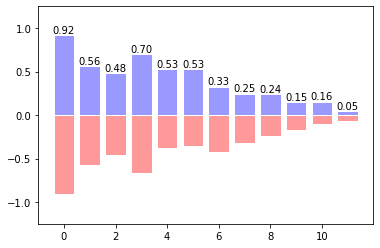

In [24]:
n = 12
X = np.arange(n)
Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

for x, y in zip(X, Y1):
    plt.text(x, y , '%.2f' % y, ha='center', va='bottom')

plt.ylim(-1.25, +1.25)

### Contour Plots

```python
matplotlib.pyplot.contour(*args, data=None, **kwargs)
```

Plot contours.

Call signature:

`contour([X, Y,] Z, [levels], **kwargs)`

`contour` and `contourf` draw contour lines and filled contours, respectively. Except as noted, function signatures and return values are the same for both versions.

<a list of 9 text.Text objects>

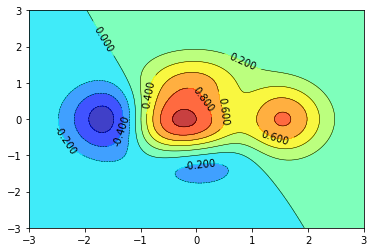

In [26]:
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 -y ** 2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)

plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap='jet')
C = plt.contour(X, Y, f(X, Y), 8, colors='black', linewidths=.5)
plt.clabel(C, C.levels)

### Imshow

```python
matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None
                         , alpha=None, vmin=None, vmax=None, origin=None, extent=None
                         , shape=<deprecated parameter>, filternorm=1, filterrad=4.0
                         , imlim=<deprecated parameter>, resample=None, url=None, *, data=None, **kwargs)
```

Display an image, i.e. data on a 2D regular raster.

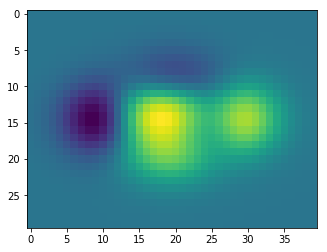

In [21]:
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)

n = 10
x = np.linspace(-3, 3, 4 * n)
y = np.linspace(-3, 3, 3 * n)
X, Y = np.meshgrid(x, y)
plt.imshow(f(X, Y))

### Pie Charts

```python
matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None
                      , pctdistance=0.6, shadow=False, labeldistance=1.1
                      , startangle=None, radius=None, counterclock=True
                      , wedgeprops=None, textprops=None, center=(0, 0)
                      , frame=False, rotatelabels=False, *, data=None)
```

Plot a pie chart.

Make a pie chart of array x. The fractional area of each wedge is given by x/sum(x). If sum(x) < 1, then the values of x give the fractional area directly and the array will not be normalized. The resulting pie will have an empty wedge of size 1 - sum(x).

The wedges are plotted counterclockwise, by default starting from the x-axis.

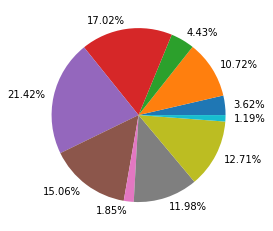

In [33]:
Z = np.random.uniform(0, 1, 10)
labels = ['{:0.2f}%'.format(i) for i in Z/Z.sum()*100]
plt.pie(Z, labels=labels)
plt.show()

### Quiver Plots

You need to draw arrows twice.

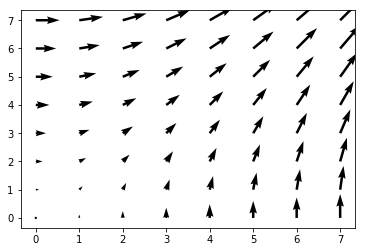

In [23]:
n = 8
X, Y = np.mgrid[0:n, 0:n]
plt.quiver(X, Y)

 ### Grids

[]

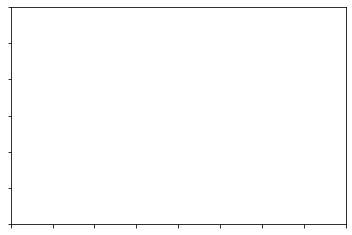

In [9]:
axes = plt.gca()
axes.set_xlim(0, 4)
axes.set_ylim(0, 3)
axes.set_xticklabels([])
axes.set_yticklabels([])

### Multi Plots

You can use several subplots with different partition.

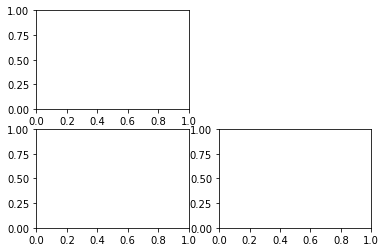

In [25]:
plt.subplot(2, 2, 1)
plt.subplot(2, 2, 3)
plt.subplot(2, 2, 4)

### Polar Axis

You only need to modify the axes line

In [13]:
help(plt.axes)

Help on function axes in module matplotlib.pyplot:

axes(arg=None, **kwargs)
    Add an axes to the current figure and make it the current axes.
    
    Call signatures::
    
        plt.axes()
        plt.axes(rect, projection=None, polar=False, **kwargs)
        plt.axes(ax)
    
    Parameters
    ----------
    arg : { None, 4-tuple, Axes }
        The exact behavior of this function depends on the type:
    
        - *None*: A new full window axes is added using
          ``subplot(111, **kwargs)``
        - 4-tuple of floats *rect* = ``[left, bottom, width, height]``.
          A new axes is added with dimensions *rect* in normalized
          (0, 1) units using `~.Figure.add_axes` on the current figure.
        - `~.axes.Axes`: This is equivalent to `.pyplot.sca`.
          It sets the current axes to *arg*. Note: This implicitly
          changes the current figure to the parent of *arg*.
    
          .. note:: The use of an `.axes.Axes` as an argument is deprecated
      

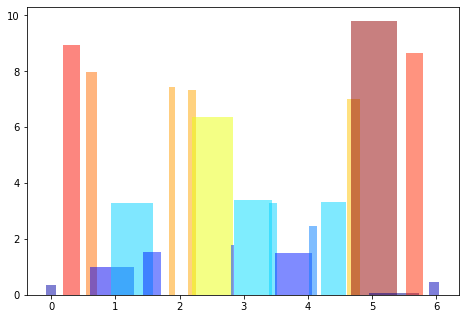

In [41]:
plt.axes([0, 0, 1, 1])

N = 20
theta = np.arange(0., 2 * np.pi, 2 * np.pi / N)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
bars = plt.bar(theta, radii, width=width, bottom=0.0)

for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / 10.))
    bar.set_alpha(0.5)

### Histogram

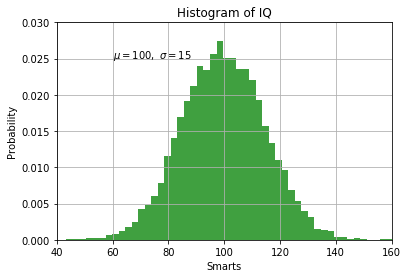

In [30]:
# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

### 3D Plots

You need to use contourf

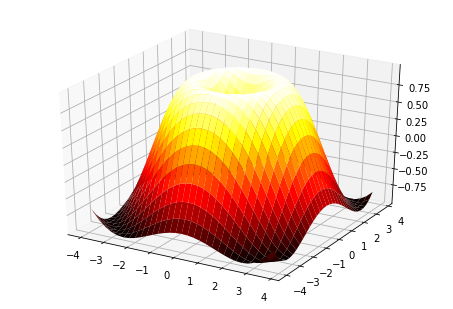

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')